In [153]:
import numpy as np
import optimisation as opt
import telegraph_backend as tele
import importlib
import noise as nois
importlib.reload(opt)
importlib.reload(tele)
importlib.reload(nois)

<module 'noise' from '/Users/krzywdaja/Documents/obsedian_test/Brain2/Science/Projects/Estimation-AI/Code/noise.py'>

## Open AI gym


In [151]:

import numpy as np
# Load the TensorBoard notebook extension
%load_ext tensorboard
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [152]:
length = 10
env = tele.Telegraph_detection(length = 10, 
                               oms = np.array([50,25]))

episodes = 1

states = []
rewards = np.zeros((episodes, length))
for episode in range(0, episodes):
    done = False
    k = 0
    n_state = env.reset()[0]
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, _, info = env.step(20)
        states.append(n_state)
        rewards[episode, k] = reward    
        #print(n_state[2:],reward, action, n_state[:2]*action*1e-3, info, n_state[:2])
        k += 1

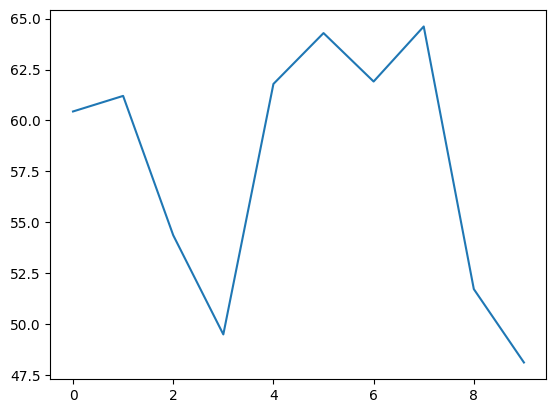

In [78]:
plt.plot(rewards[0])

In [149]:
import gymnasium as gym
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.callbacks import EvalCallback
#import monitor
from stable_baselines3.common.monitor import Monitor

# Save a checkpoint every 1000 steps
'''
checkpoint_callback = CheckpointCallback(
  save_freq=10000,
  save_path="./logs/",
  name_prefix="flex_",
  save_replay_buffer=True,
  save_vecnormalize=True,
)
'''


# Parallel environments
logdir ="./ppo_bayes_tensorboard/"

env = tele.Telegraph_detection(length = 10, 
                               oms = [None]*3)

env = Monitor(env, logdir)
eval_callback = EvalCallback(env, best_model_save_path="./logs2/",
                             log_path="./logs2/", eval_freq=25000,
                             deterministic=False, render=False, n_eval_episodes=25) #?

if not os.path.exists("./ppo_bayes_tensorboard/"):
    os.makedirs("./ppo_bayes_tensorboard/")

#model = model.load("logs/best_model.zip")
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_bayes_tensorboard/")

model.learn(total_timesteps=500000, tb_log_name="PPO",callback=eval_callback )
model.save("flex")

    


Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_bayes_tensorboard/PPO_31


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10       |
|    ep_rew_mean     | 143      |
| time/              |          |
|    fps             | 2210     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10          |
|    ep_rew_mean          | 141         |
| time/                   |             |
|    fps                  | 1159        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.002775168 |
|    clip_fraction        | 0.0186      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.000484    |
|    learning_rate        | 0.

In [5]:
%tensorboard --logdir ppo_bayes_tensorboard --port 6071

Reusing TensorBoard on port 6071 (pid 17465), started 0:00:02 ago. (Use '!kill 17465' to kill it.)

# Plot the reward for N=100

In [134]:
om0 = 50
env = tele.Telegraph_detection(length = 5, 
                               oms = [None]*4)
model = model.load("logs2/best_model.zip")
results = []
N = 10
length = 5
rewards = np.zeros((N, length))
for episode in range(0, N):
    done = False
    k = 0
    n_state = env.reset()[0]
    while not done:
        action,_ = model.predict(n_state)
        n_state, reward, done, _, info = env.step(action)
        states.append(n_state)
        rewards[episode, k] = reward    
        k += 1
    print(n_state[:4])
        
##res1 = evaluate_policy(model, env, n_eval_episodes=N, deterministic=False, return_episode_rewards=True)

#res2 =  opt.game(N, env, model)


[ 8.71095539 55.35365883 42.74426257 38.00901972]
[58.52337031 31.18139148 27.7888892  11.49569705]
[42.85376988 45.20091643 95.36003422 62.46519761]
[51.10894775 94.22510187 74.9155613  83.68935811]
[ 47.84094728  33.90415924  49.83028776 111.56262147]
[33.12484983 63.35677447 53.34656031 57.14424816]
[36.57396813 56.4121027  51.59554863 48.27321122]
[59.1672796  33.45707356 52.60955683 35.88989646]
[90.7053652  41.33269839 59.64184421 28.68183583]
[29.08682482  1.05495235 77.55261881 46.57403847]


In [38]:
np.average(res2.rewards.sum(axis=1)    )
#TODO: real number

53.3

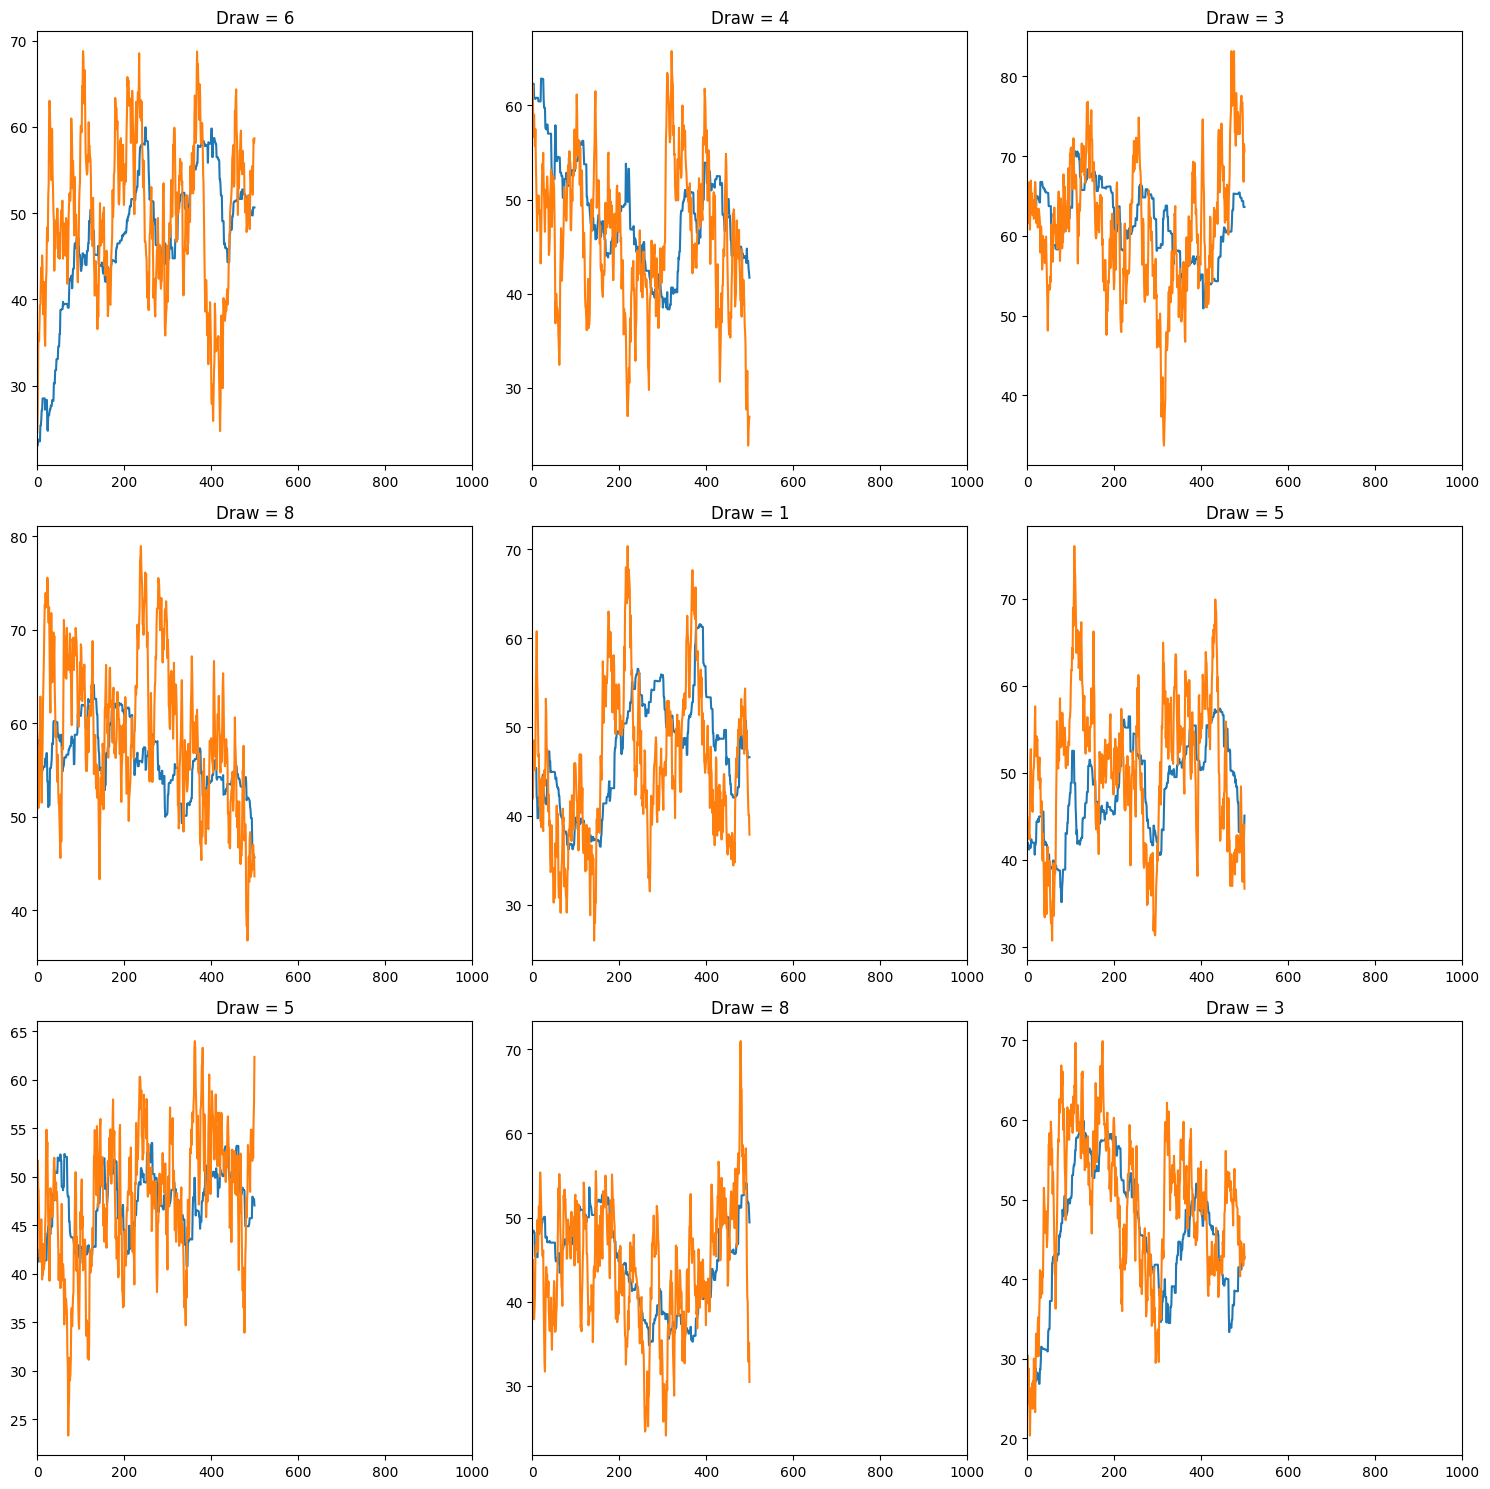

In [39]:
#create 4x4 subplots
fig, axs = plt.subplots(int(np.sqrt(N)), int(np.sqrt(N)), figsize=(15, 15))
#draw 16 integers from 0 to 50
draws = np.random.randint(0,N,50)
for i, ax in enumerate(axs.flat):
    ax.plot(res2.mus[i])
    ax.plot(np.abs(res2.oms[i]))
    ax.set_title(f"Draw = {draws[i]}")
    #ax.set_ylim(0,50)
    ax.set_xlim(0,1000)
plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'figures/games1/f.png'

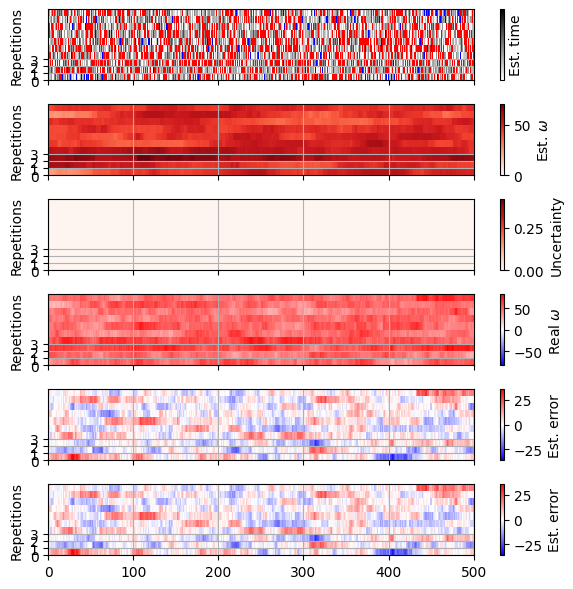

In [46]:
import utils as utl
importlib.reload(utl)
utl.analyse_few_games3(res2, "1/f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 640x480 with 0 Axes>

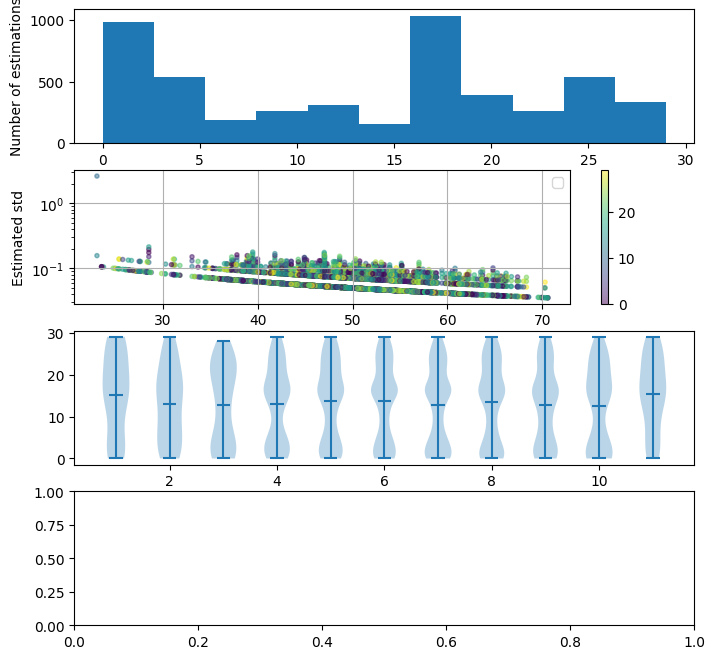

In [41]:
utl.analyse_time(res2, "1/f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Probability of estimation:  0.6052
Probability of success:  0.3686
Probability of failing:  0.0262
Probability of success given flip:  0.9336372847011145


/Users/krzywdaja/anaconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


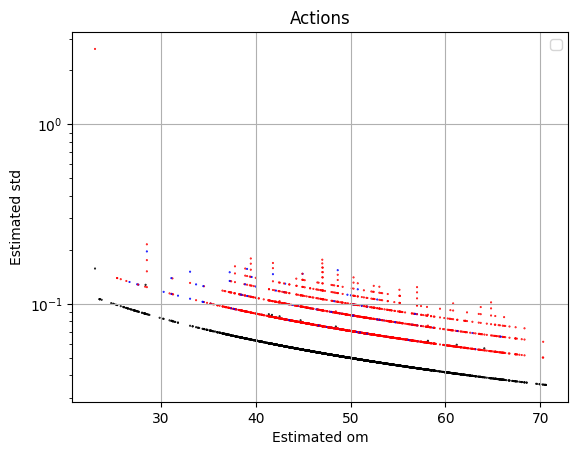

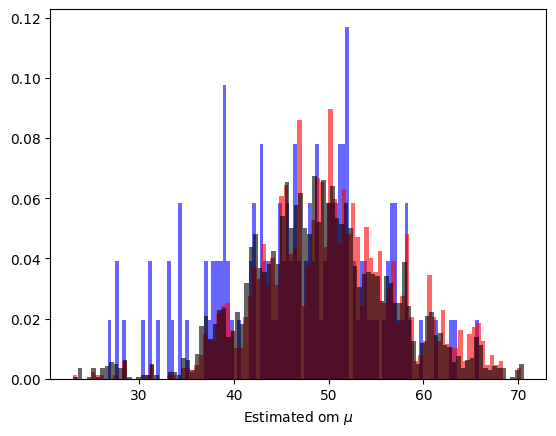

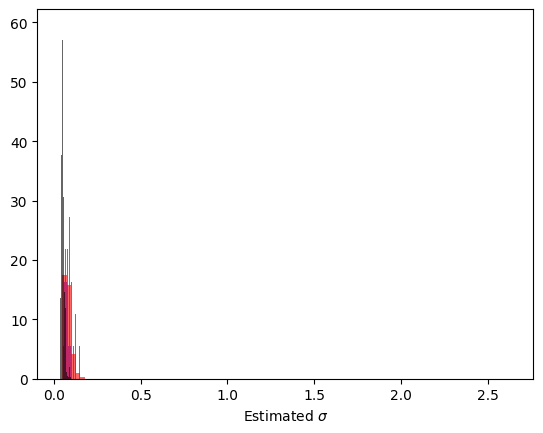

In [42]:
utl.analyse_decisions(res2, str(1e3))

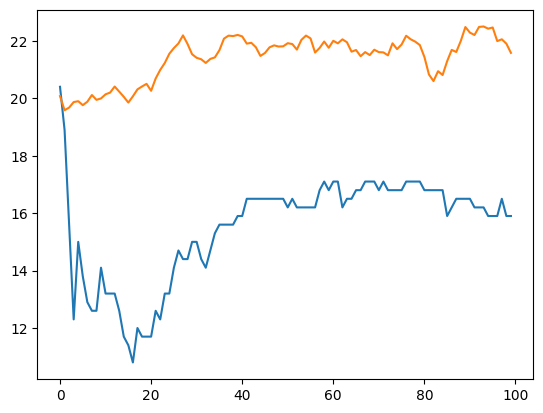

In [ ]:
plt.plot(res2.mus[8])
plt.plot(np.abs(res2.oms[8]))

NameError: name 'colors' is not defined

<Figure size 640x480 with 0 Axes>

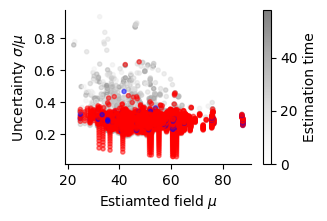

In [680]:
plt.figure(figsize= (3,2))
x = res2.mus[res2.actions[0]==1].flatten()
y = res2.stds[res2.actions[0]==1].flatten()
c = res2.actions[1][res2.actions[0]==1].flatten()


plt.scatter(x,y/x,c=c, alpha=0.5, marker=".", cmap="Grays", vmax = 2*np.max(c))

plt.xlabel("Estiamted field $\mu$")
plt.ylabel("Uncertainty $\sigma/\mu$")
c = plt.colorbar()
c.set_label("Estimation time")
x = res2.mus[res2.actions[0]==0].flatten()
y = res2.stds[res2.actions[0]==0].flatten()
c = res2.rewards[res2.actions[0]==0].flatten()

plt.scatter(x,y/x,c=c, alpha=0.5, marker=".", cmap="bwr")
#get rid of the frame of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()



ValueError: For X (7) and Y (3) with flat shading, A should have shape (2, 6, 3) or (2, 6, 4) or (2, 6) or (12,), not (2, 6, 1000)

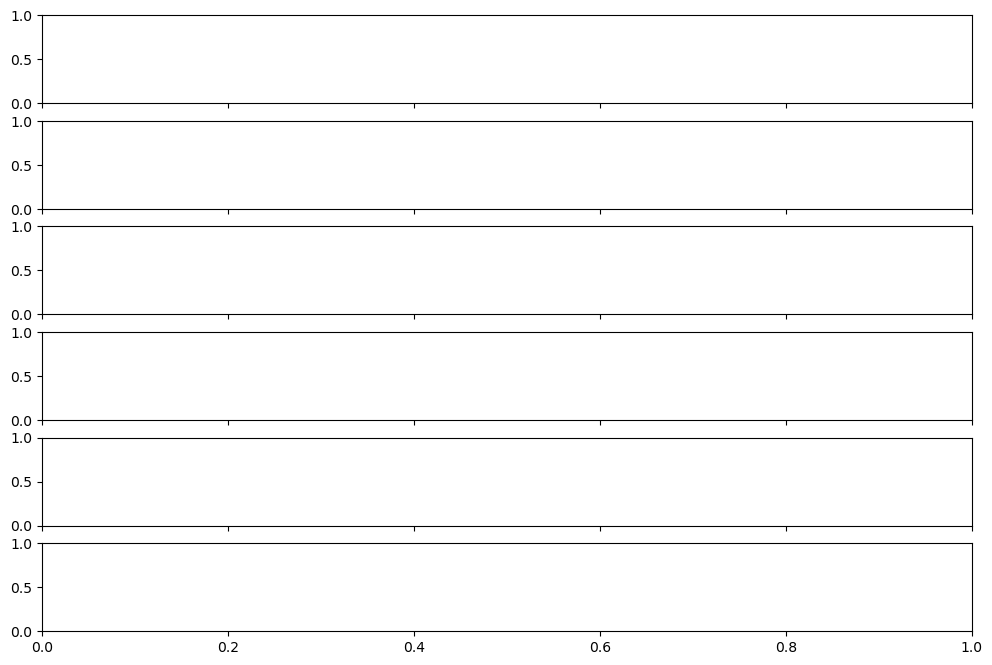

In [ ]:


tcs = [1e3]
for tc in tcs:


    samples = 6
    model = model.load("flex")


    results = opt.game(episodes = samples, model=model, env=env)
    
    est.analyse_few_games(results, str(tc))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


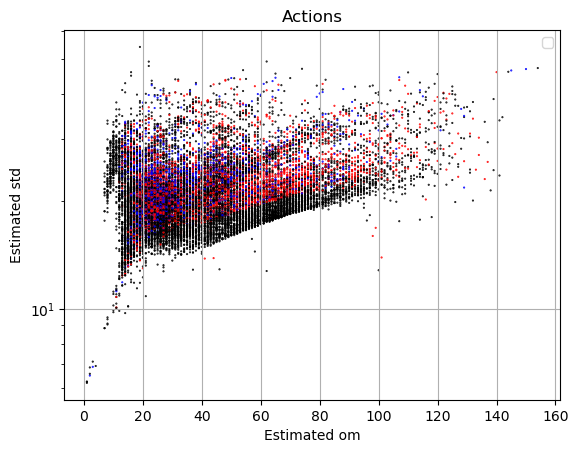

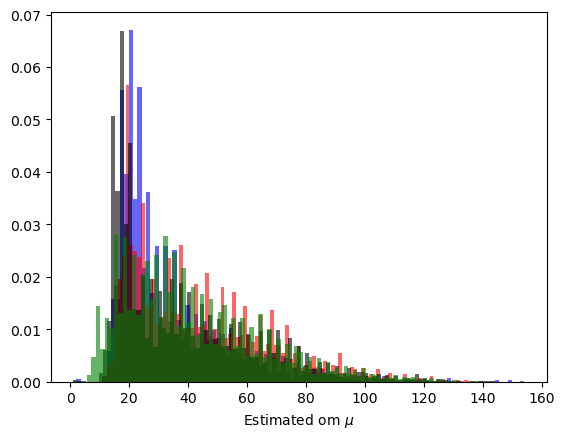

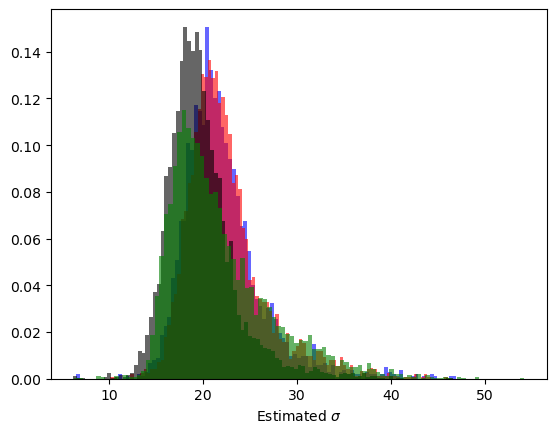

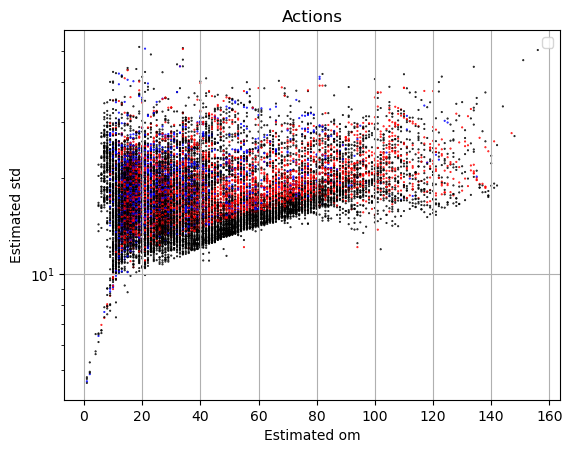

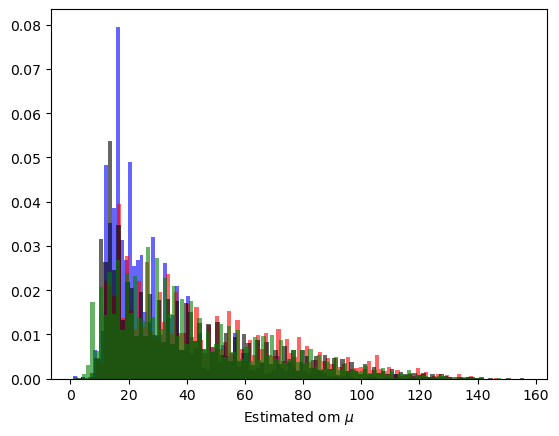

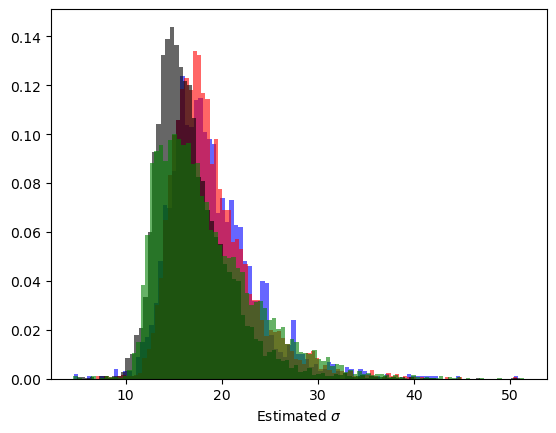

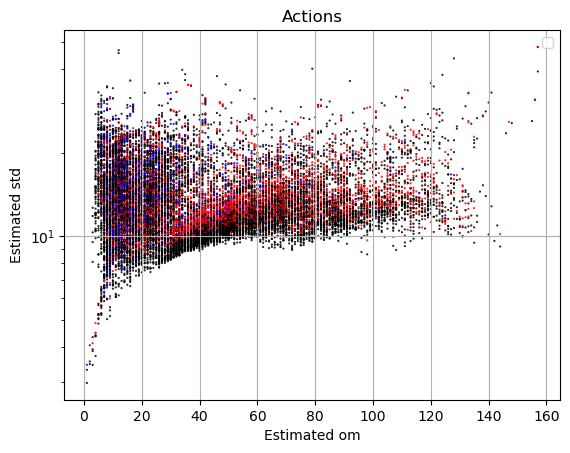

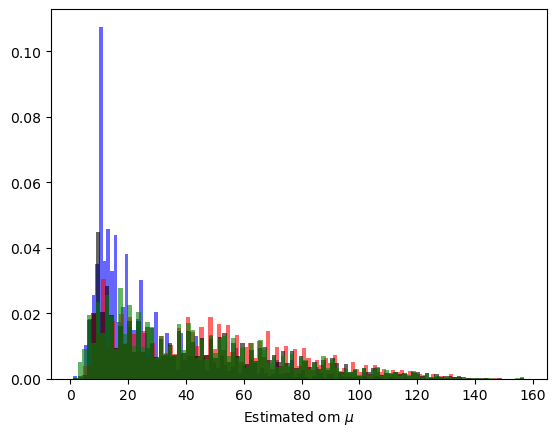

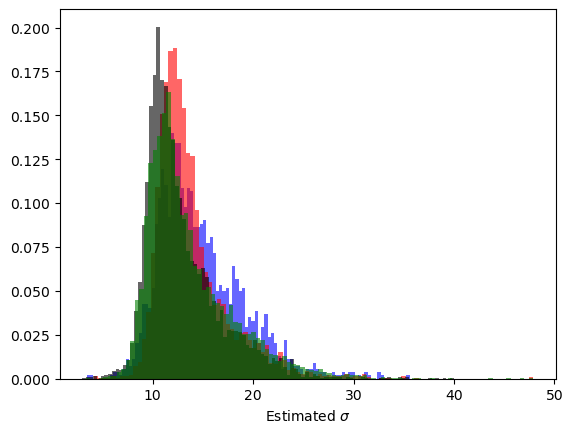

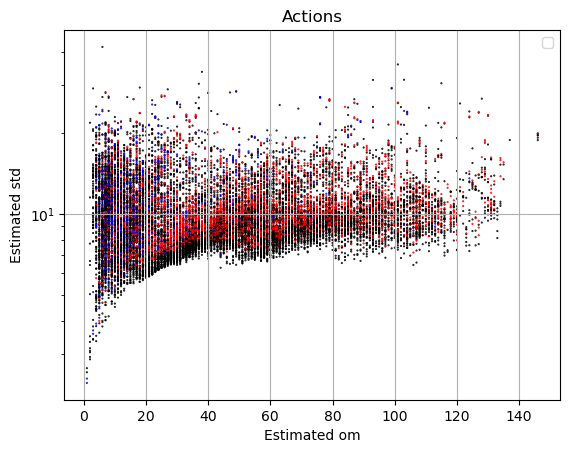

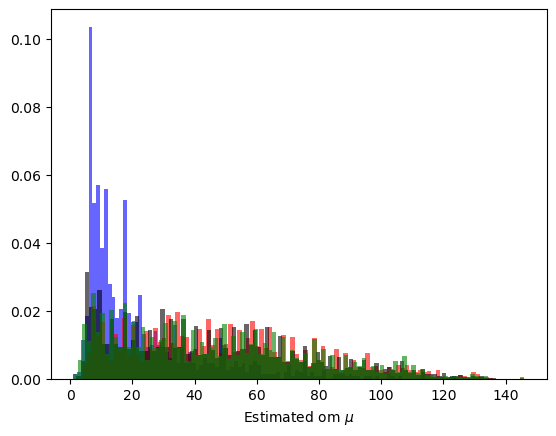

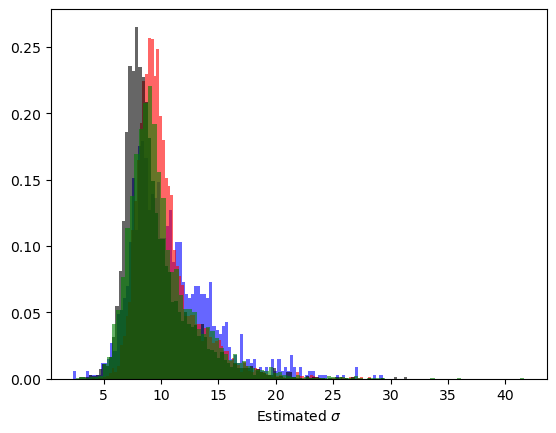

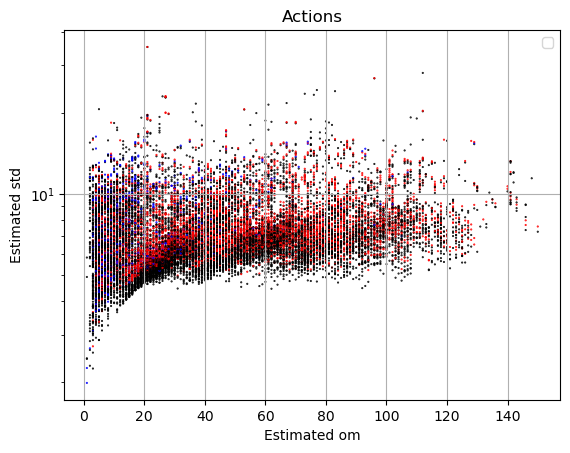

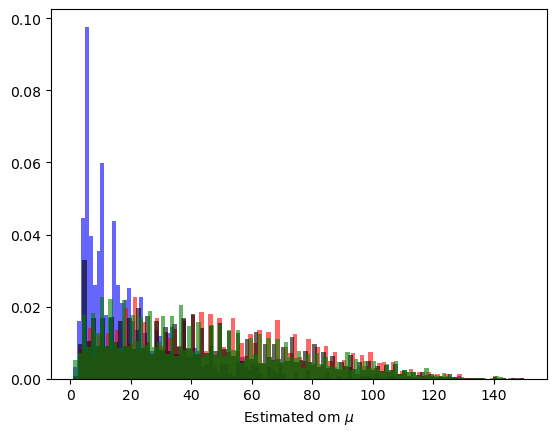

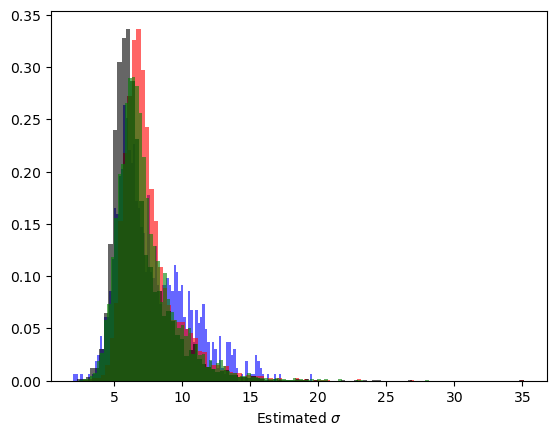

In [ ]:
for tc in tcs:


    samples = 20
    model.load("ppo_N1e3_check_"+str(tc))
    env = est.EstimationEnv(length = int(1e3), tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                        seed_shot= seed_environment, seed_field = seed_environment)

    results = opt.game(episodes = samples, model=model, env=env)

    est.analyse_decisions(results, str(tc))



In [ ]:
env.tc

50

In [ ]:

policies = opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval
bounds = [np.array([[0,1],[0,1],[0,1]]),
            np.array([[0,10],[0,1]]),
            np.array([[0,100],[0,1]]),
            np.array([[0,100],[0,100],[0,100]])]
sigmas = [np.array(0.5), np.array(50.), np.array(50.), np.array(50.)]
means = [np.array([0.7,0.2,0.1]), np.array([5.,0.5]), np.array([50.,0.2]), np.array([50.,10.,2.])]


xs = []
for tc in [1e3]:
    xs_tc = []
    for pn,policy in enumerate(policies):
        if pn==0:
            print(bounds[pn])
            print(sigmas[pn])
            print(means[pn])
            env = est.EstimationEnv(length = 1000, tc = 1e3, om0=om0, sigma = sigma, initial_std=initial_std,
                            seed_field = None, seed_shot = None)
            Opt = opt.CMA_optimizer(policy = policies[pn], 
                            generations = 20, 
                            population_size=10, 
                            bounds = bounds[pn], 
                            sigma = sigmas[pn], 
                            mean= means[pn], 
                            episodes = 20,
                            env=env)
            sol = Opt.optimize()
            x_avg, f_avg = Opt.get_representative()
            xs_tc.append(x_avg)
    xs.append(xs_tc)
    

[[0 1]
 [0 1]
 [0 1]]
0.5
[0.7 0.2 0.1]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
xs_tc

[array([0.68408767, 0.10764053, 0.09382284])]

In [ ]:
#save nested xs list to file
import pickle
with open('xs2.pkl', 'wb') as f:
    pickle.dump(xs, f)


In [ ]:
#load nested xs list from file
import pickle
with open('xs.pkl', 'rb') as f:
    xs = pickle.load(f)


In [ ]:
xs

[[array([0.73117156, 0.4093704 , 0.02254516]),
  array([6.02575545, 0.51700893]),
  array([55.43331841,  0.70820324]),
  array([46.3830937 , 13.06998139,  3.46838991])],
 [array([0.75365769, 0.24433546, 0.01646223]),
  array([5.81209298, 0.39922085]),
  array([49.21792449,  0.93059551]),
  array([49.83677335,  6.28488514,  0.66992279])],
 [array([0.72633717, 0.17840917, 0.00897916]),
  array([4.94913091, 0.53521408]),
  array([49.40604232,  0.63984954]),
  array([47.68936452,  9.4728695 ,  0.5825536 ])]]

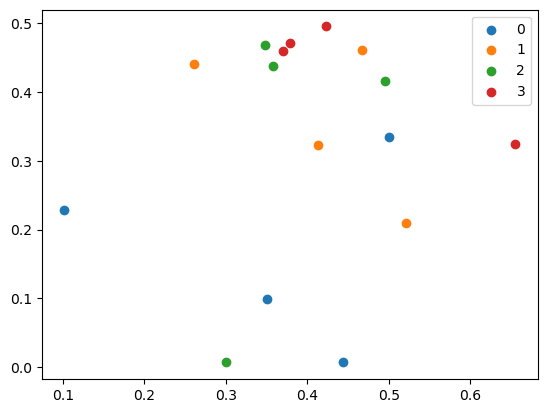

In [ ]:
sol[:,:,:3] = sol[:,:,:3]/np.sum(sol[:,:,:3],axis=2)[...,None]
for k in range(4):
    plt.scatter(sol[k,:,0], sol[k,:,1], label = str(k))
plt.legend()

In [ ]:
import numpy as np
import optimisation as opt
import estimation_environment as est
import importlib
importlib.reload(opt)
importlib.reload(est)
policies = 7
'''
-always flip
-random
-random with flip p =0.8, est p = 0.15, check p = 0,5
-flip only if std/mu below 0.5
-flip only if mu is above 10
-estimate 5 shots every 30 shots
-agent
'''





#model = model.load("ppo_bayes2")

samples = 50

policies_all = opt.policy_flip, opt.policy_random, opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval

tot_reward = np.zeros((len(tcs),len(policies_all)+1,samples))

for tcn, tc in enumerate(tcs):
    model.load("ppo_N500_"+str(tc))
    
    for pn,policy in enumerate(policies_all):
        
        env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
        if pn>1:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, x = xs[tcn][pn-2], rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
        else:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
    
    env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
    results = opt.game(episodes = samples, model=model, env=env)
    tot_reward[tcn,-1,:] =  np.sum(results.rewards,axis=1)

In [ ]:
tcs

[100, 200, 300]

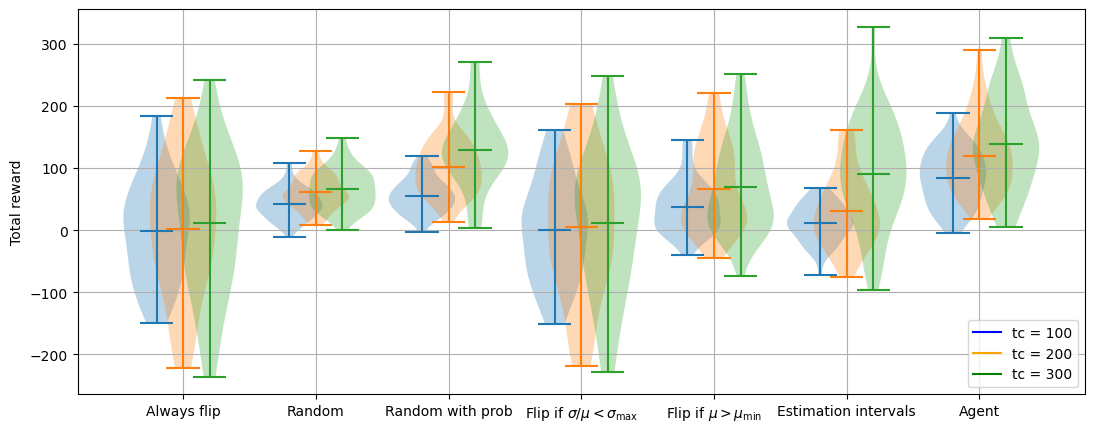

In [ ]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8)-.2+tcn*0.2, widths=0.5)
plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                            "Estimation intervals","Agent"])
plt.ylabel("Total reward")
#plt.ylim(-200,550)
plt.grid()
plt.plot([],[],color = "blue", label="tc = 100")
plt.plot([],[],color = "orange", label="tc = 200")
plt.plot([],[],color = "green", label="tc = 300")
plt.legend(loc="lower right")


<Figure size 1300x500 with 0 Axes>

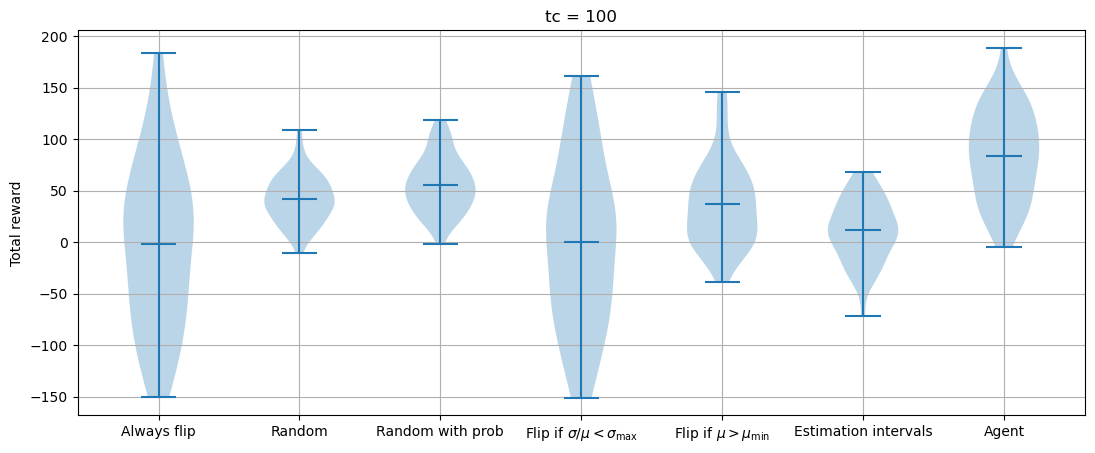

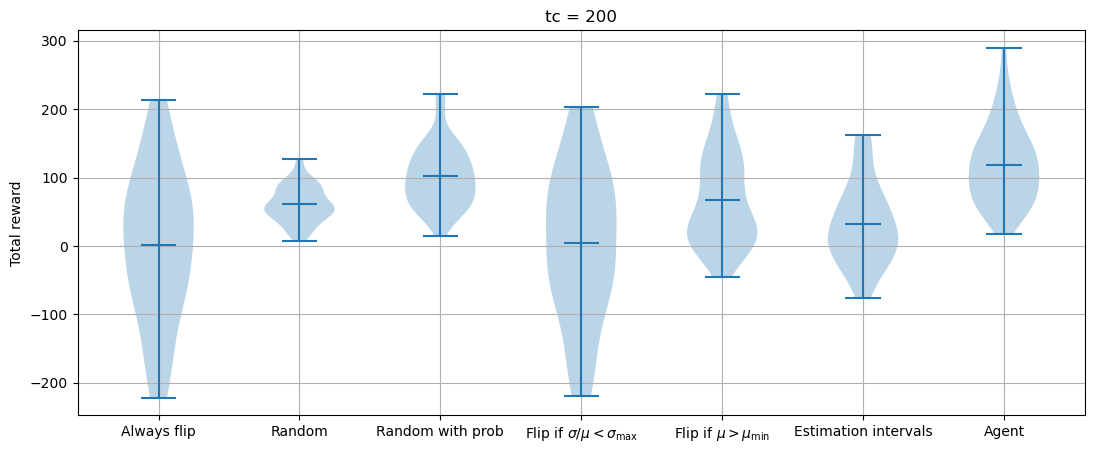

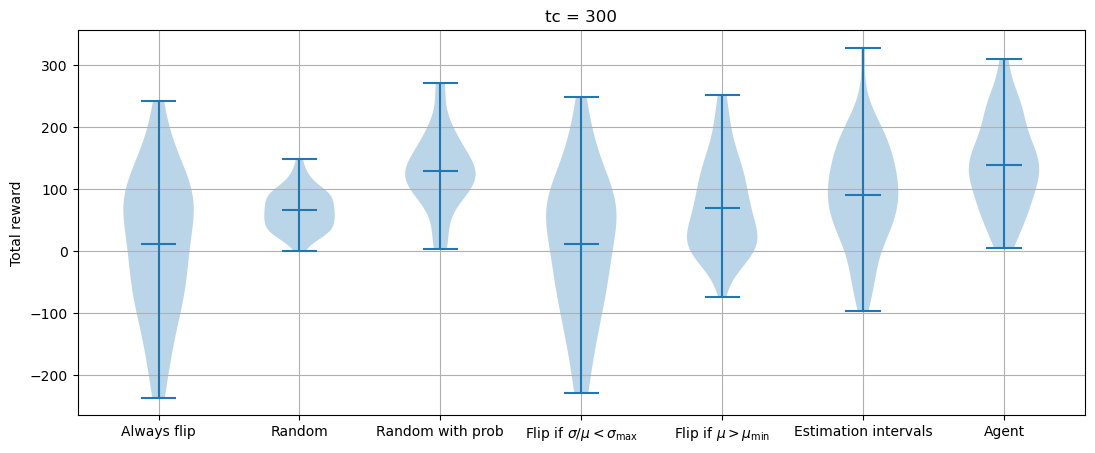

In [ ]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.figure(figsize=(13,5))
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8), widths=0.5)
    plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                                "Estimation intervals","Agent"])
    plt.ylabel("Total reward")
    plt.grid()
    plt.title("tc = "+str(tc))
    #plt.ylim(-200,550)
plt.plot([],[],color = "blue", label="tc = 50")
plt.plot([],[],color = "orange", label="tc = 500")
plt.plot([],[],color = "green", label="tc = 5000")
#plt.legend(loc="lower right")